In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat

### Importing data.

In [4]:
saldt=pd.read_csv('C:/Users/Lenovo/OneDrive/Desktop/ICT Academy/CS05 Sales_data_zone_wise.csv')
saldt.head(7)

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062
5,Month - 6,1534390,1573128,1751825,2292044
6,Month - 7,1820196,1992031,1786826,1688055


### Screening data.

In [5]:
saldt.isna().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

**Conclusion**<br>
Which is very clear that there is no missing values in given data.


In [7]:
saldt.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


# (i) Mean sales for each regions:-

In [10]:
means_col=['Zone - A','Zone - B','Zone - C','Zone - D']
saldt[means_col].mean()

Zone - A    1.540493e+06
Zone - B    1.755560e+06
Zone - C    1.772871e+06
Zone - D    1.842927e+06
dtype: float64

**NB**:-<space>
which is very clear that from the data info and from the above output means for reach is given as above.

#### Graphically

<AxesSubplot:>

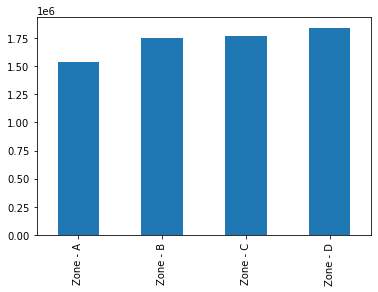

In [11]:
saldt.mean().plot(kind='bar')

# (i) Sales mean of each month:-

In [21]:
month=saldt.mean(axis=1)
print(month)

0     1727706.4
1     1725045.5
2     1690384.3
3     1998008.6
4     1484158.8
5     1741029.2
6     1838644.3
7     1892382.8
8     1693283.6
9     1802192.9
10    1781041.1
11    1563536.5
12    1469426.0
13    1797691.0
14    1480111.0
15    1604690.5
16    1703326.4
17    1763651.7
18    1708480.9
19    1711484.0
20    1836296.1
21    1812919.5
22    1725568.7
23    1920318.7
24    1507084.0
25    1616303.8
26    1590342.5
27    1810647.1
28    1651530.0
dtype: float64


# (iii) One Way Anova

From the provided information's we have one factor that is 'Months' and factor has four level that is treatments are Zone - A, Zone - B, Zone - C and Zone - D respectively.

## Assumption checking

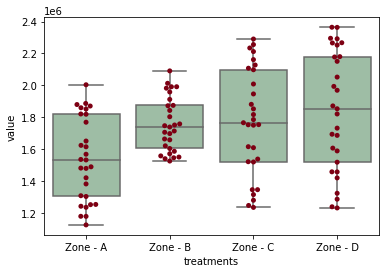

In [28]:
saldt1 = pd.melt(saldt.reset_index(), id_vars=['index'], value_vars=['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'])
saldt1.columns = ['index', 'treatments', 'value']
ax = sns.boxplot(x='treatments', y='value', data=saldt1, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=saldt1, color='#7d0013')
plt.show()

Since there is no values lies outside of lower and upper limit, we can assume normality and also Homoscedasticity. 

### (i) Method - 1 

In [38]:
mfit= ols('value ~ C(treatments)', data=saldt1).fit()
anvtab= sm.stats.anova_lm(mfit, typ=2)
anvtab

,sum_sq,df,F,PR(>F)
C(treatments),1.483058e+12,3.0,5.672056,0.001183
Residual,9.761449e+12,112.0,NaN,NaN


### (ii) Method - 2. Using Bio info kit

In [43]:
mfit2=stat()
mfit2.anova_stat(df=saldt1,res_var='value',anova_model='value~C(treatments)')
mfit2.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,1.483058e+12,4.943525e+11,5.672056,0.001183
Residual,112.0,9.761449e+12,8.715579e+10,NaN,NaN


## 5 Step hypothesis:

<U>**Hypothesis:**</u><br>
Null hypothesis<space><space>		H0:  µ1 = µ2 = µ3 {This is claim}<br>
Alternative hypothesis <space><space>  HA: At least one of µi’s are not equal <br>
<u>**Test statistic:**</u><br>
F = 5.67<br>
<u>**P-value:**</u><br>
By p value approximation method, the p value using F-distribution at df1 = 3 and df2 = 112 it is given as below;<br>
P-value <space>=<space> P (F3,112 > 5.67)<space> = <space>0.0012 <br>
<u>**Decision:**</u><br>
Since P-value = 0.0012 < α = 0.05, we can conclude that we reject H0.<br>
<u>**Conclusion:**</u><br>
At 5% level of significance, we can conclude that there is no sufficient enough evidence to support the claim the all four zone generates the same amount of sales.


Since when we rejected the null hypothesis we can say that the at least one of the mean is different. So, we can do Tukey_HSD to which treatment is different.

In [45]:
thsd= stat()
thsd.tukey_hsd(df=saldt1,res_var='value',xfac_var='treatments',anova_model='value~C(treatments)')
thsd.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Zone - A,Zone - B,215066.448276,12856.297302,417276.599250,3.923047,0.032441
1,Zone - A,Zone - C,232377.896552,30167.745578,434588.047526,4.238827,0.017418
2,Zone - A,Zone - D,302433.620690,100223.469716,504643.771664,5.516720,0.001000
3,Zone - B,Zone - C,17311.448276,-184898.702698,219521.599250,0.315780,0.900000
4,Zone - B,Zone - D,87367.172414,-114842.978560,289577.323388,1.593673,0.654049
5,Zone - C,Zone - D,70055.724138,-132154.426836,272265.875112,1.277893,0.778653


<u>**Conclusion**</u><br>
We can conclude that all pair-wise comparison of Zone - A with other Zone's are statistically significant.